In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import plotly as py
import matplotlib.pyplot as plt


from tqdm import tqdm, trange
import seaborn as sns
import random
from sklearn import preprocessing


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from pprint import pprint
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


Logistic Regression preparation/implementation

In [344]:

logit_model=sm.Logit(df_train2_y,df_train2_x)
result=logit_model.fit()
print(result.summary2())
#print(result.summary())

Optimization terminated successfully.
         Current function value: 0.093390
         Iterations 10
                              Results: Logit
Model:                  Logit              Pseudo R-squared:   0.025      
Dependent Variable:     anomaly            AIC:                261518.7839
Date:                   2022-09-26 08:50   BIC:                261859.0362
No. Observations:       1399843            Log-Likelihood:     -1.3073e+05
Df Model:               27                 LL-Null:            -1.3406e+05
Df Residuals:           1399815            LLR p-value:        0.0000     
Converged:              1.0000             Scale:              1.0000     
No. Iterations:         10.0000                                           
--------------------------------------------------------------------------
                           Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
meter_reading             -

In [347]:

logit_model=sm.Logit(df_train2_y,X_train)
result=logit_model.fit()
print(result.summary2())
#print(result.summary())

Optimization terminated successfully.
         Current function value: 0.692958
         Iterations 3
                          Results: Logit
Model:              Logit            Pseudo R-squared: -6.236      
Dependent Variable: anomaly          AIC:              1940121.4675
Date:               2022-09-26 15:28 BIC:              1940461.7198
No. Observations:   1399843          Log-Likelihood:   -9.7003e+05 
Df Model:           27               LL-Null:          -1.3406e+05 
Df Residuals:       1399815          LLR p-value:      1.0000      
Converged:          1.0000           Scale:            1.0000      
No. Iterations:     3.0000                                         
----------------------------------------------------------------------
        Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
----------------------------------------------------------------------
x1     -0.0334      0.0033     -9.9922    0.0000    -0.0400    -0.0268
x2      0.0060      0.0021   

In [49]:
#creating dummy variables for logistic regression instead of using onehot encoding
df_dummies=pd.get_dummies(df_train_full['primary_use'],drop_first=True)


In [50]:
df_dummies.head()

,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Services
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [51]:
df_full_2_lr=pd.concat([df_train_full,df_dummies], axis=1)

In [52]:
df_train2_lr = df_full_2_lr[df_full_2_lr['building_id']<1242]

In [53]:
df_val_lr = df_full_2_lr[df_full_2_lr['building_id']>=1242] #20% split (will need to change when I add more data)

In [54]:
df_train2_x_lr = df_train2_lr.drop(['anomaly','building_id', 'site_id','primary_use','weekday_hour','date' ], axis=1)
df_val_x_lr = df_val_lr.drop(['anomaly','building_id', 'site_id','primary_use','weekday_hour','date'], axis=1)

In [55]:
#scaling features that need it 
#https://datascience.stackexchange.com/questions/38395/standardscaler-before-or-after-splitting-data-which-is-better
sc = StandardScaler()
X_train_lr = sc.fit_transform(df_train2_x_lr)
X_test_lr = sc.transform (df_val_x_lr)

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:

results=logisticRegr.fit(X_train_lr, df_train2_y)

y_predict_lr = results.predict(X_test_lr) 
score=results.score(X_test_lr, df_val_y)


In [499]:
df_train2_y.value_counts()

0    1372660
1      27183
Name: anomaly, dtype: int64

In [500]:
df_val_y.value_counts()

0    339538
1     10113
Name: anomaly, dtype: int64

In [501]:
unique, counts = np.unique(y_predict_lr, return_counts=True)

dict(zip(unique, counts))

{0: 349651}

In [531]:
cm = metrics.confusion_matrix(df_val_y, y_predict_lr)
print(cm)

[[339538      0]
 [ 10113      0]]


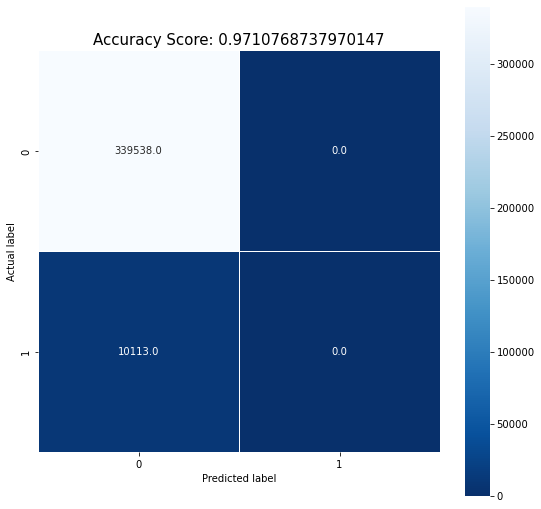

In [532]:
#very poor performance of logistic regression

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [535]:
#https://stackoverflow.com/questions/31417487/sklearn-logisticregression-and-changing-the-default-threshold-for-classification
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train_lr, df_train2_y)
THRESHOLD = 0.39
preds = np.where(clf.predict_proba(X_test_lr)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(df_val_y, preds), recall_score(df_val_y, preds),
                   precision_score(df_val_y, preds), roc_auc_score(df_val_y, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.370615
recall,0.757243
precision,0.033995
roc_auc_score,0.558171


In [536]:
cm = metrics.confusion_matrix(df_val_y, preds)
print(cm)

[[121928 217610]
 [  2455   7658]]


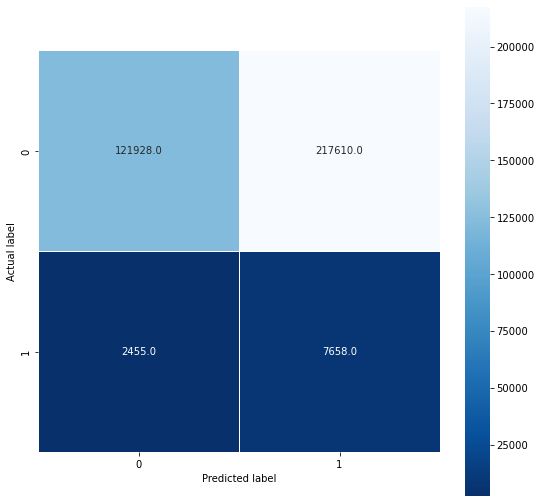

In [537]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');